In [212]:
import xarray as xr
import glob
import matplotlib.pyplot as plt
from shapely.geometry import mapping
import geopandas as geo
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 600

In [48]:
basins = geo.read_file('mideast_transbo_shp/transboundary_all.shp').copy()
basins

,Id,Aquifer,geometry
0,0,Umm Er Radhuma,"POLYGON ((221734.291 3534251.896, 268251.879 3..."
1,0,Wasia,"POLYGON ((611943.684 3212555.014, 610610.274 3..."
2,0,Wasia,"POLYGON ((746630.223 2848707.470, 746666.534 2..."
3,0,Wajid,"POLYGON ((693154.192 2403487.176, 690837.352 2..."


In [45]:
# for x in basins.geometry:
#     print(x)

In [41]:
type(basins.geometry[0])

shapely.geometry.polygon.Polygon

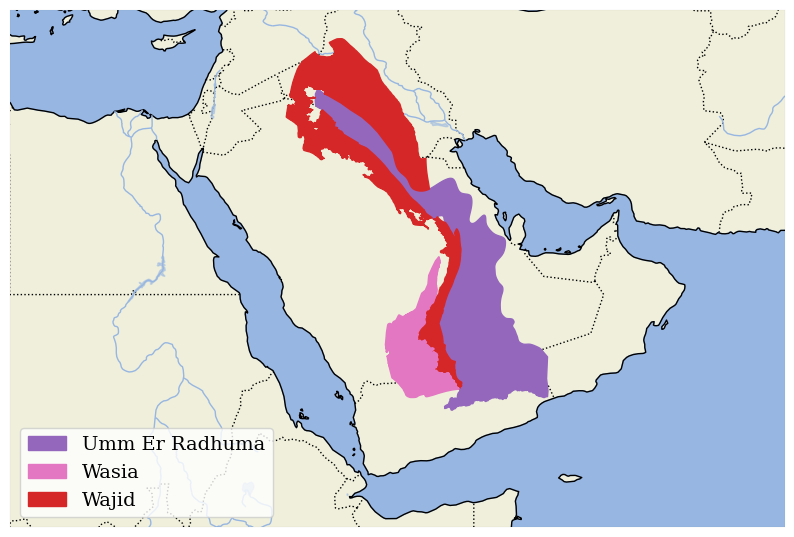

In [94]:
fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([25, 65, 10, 35])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.add_geometries([basins.geometry[0]],crs=ccrs.epsg(32638),color='tab:purple') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[1]],crs=ccrs.epsg(32638),color='tab:red') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[2]],crs=ccrs.epsg(32638),color='tab:red') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[3]],crs=ccrs.epsg(32638),color='tab:pink') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color

umm_er_radhuma = mpatches.Patch(color='tab:purple', label=basins.Aquifer[0]) #creates legend item, specifies color
wasia = mpatches.Patch(color='tab:pink', label=basins.Aquifer[1]) #creates legend item, specifies color
# two = mpatches.Patch(color='tab:orange', label=basins.Aquifer[2]) #creates legend item, specifies color
wajid = mpatches.Patch(color='tab:red', label=basins.Aquifer[3]) #creates legend item, specifies color




ax.legend(handles=[umm_er_radhuma,wasia,wajid],loc='lower left',fontsize=14) # creates legend



plt.show() ## plots figure

In [98]:
import matplotlib.gridspec as gridspec

In [161]:
umm = geopandas.read_file('mideast_transbo_shp/transboundary_all.shp',rows=slice(0,1))
umm

,Id,Aquifer,geometry
0,0,Umm Er Radhuma,"POLYGON ((221734.291 3534251.896, 268251.879 3..."


In [162]:
wasia = geopandas.read_file('mideast_transbo_shp/transboundary_all.shp',rows=slice(1,3))
wasia

,Id,Aquifer,geometry
0,0,Wasia,"POLYGON ((611943.684 3212555.014, 610610.274 3..."
1,0,Wasia,"POLYGON ((746630.223 2848707.470, 746666.534 2..."


In [163]:
wajid = geopandas.read_file('mideast_transbo_shp/transboundary_all.shp',rows=slice(3,4))
wajid

,Id,Aquifer,geometry
0,0,Wajid,"POLYGON ((693154.192 2403487.176, 690837.352 2..."


In [145]:
umm.to_file('umm/umm.shp')
wasia.to_file('wasia/wasia.shp')
wajid.to_file('wajid/wajid.shp')

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [148]:
def clip2(raster,basin):
    basin = geopandas.read_file(basin)
    rast = xr.open_dataset(raster)
    rast.rio.write_crs(4326,inplace=True)
    rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    # r_clip.to_netcdf(f'gldas__clip/rioclip__ksa_transbo.nc')
    return r_clip

ERROR 1: PROJ: proj_create_from_database: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_create_from_database: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR me

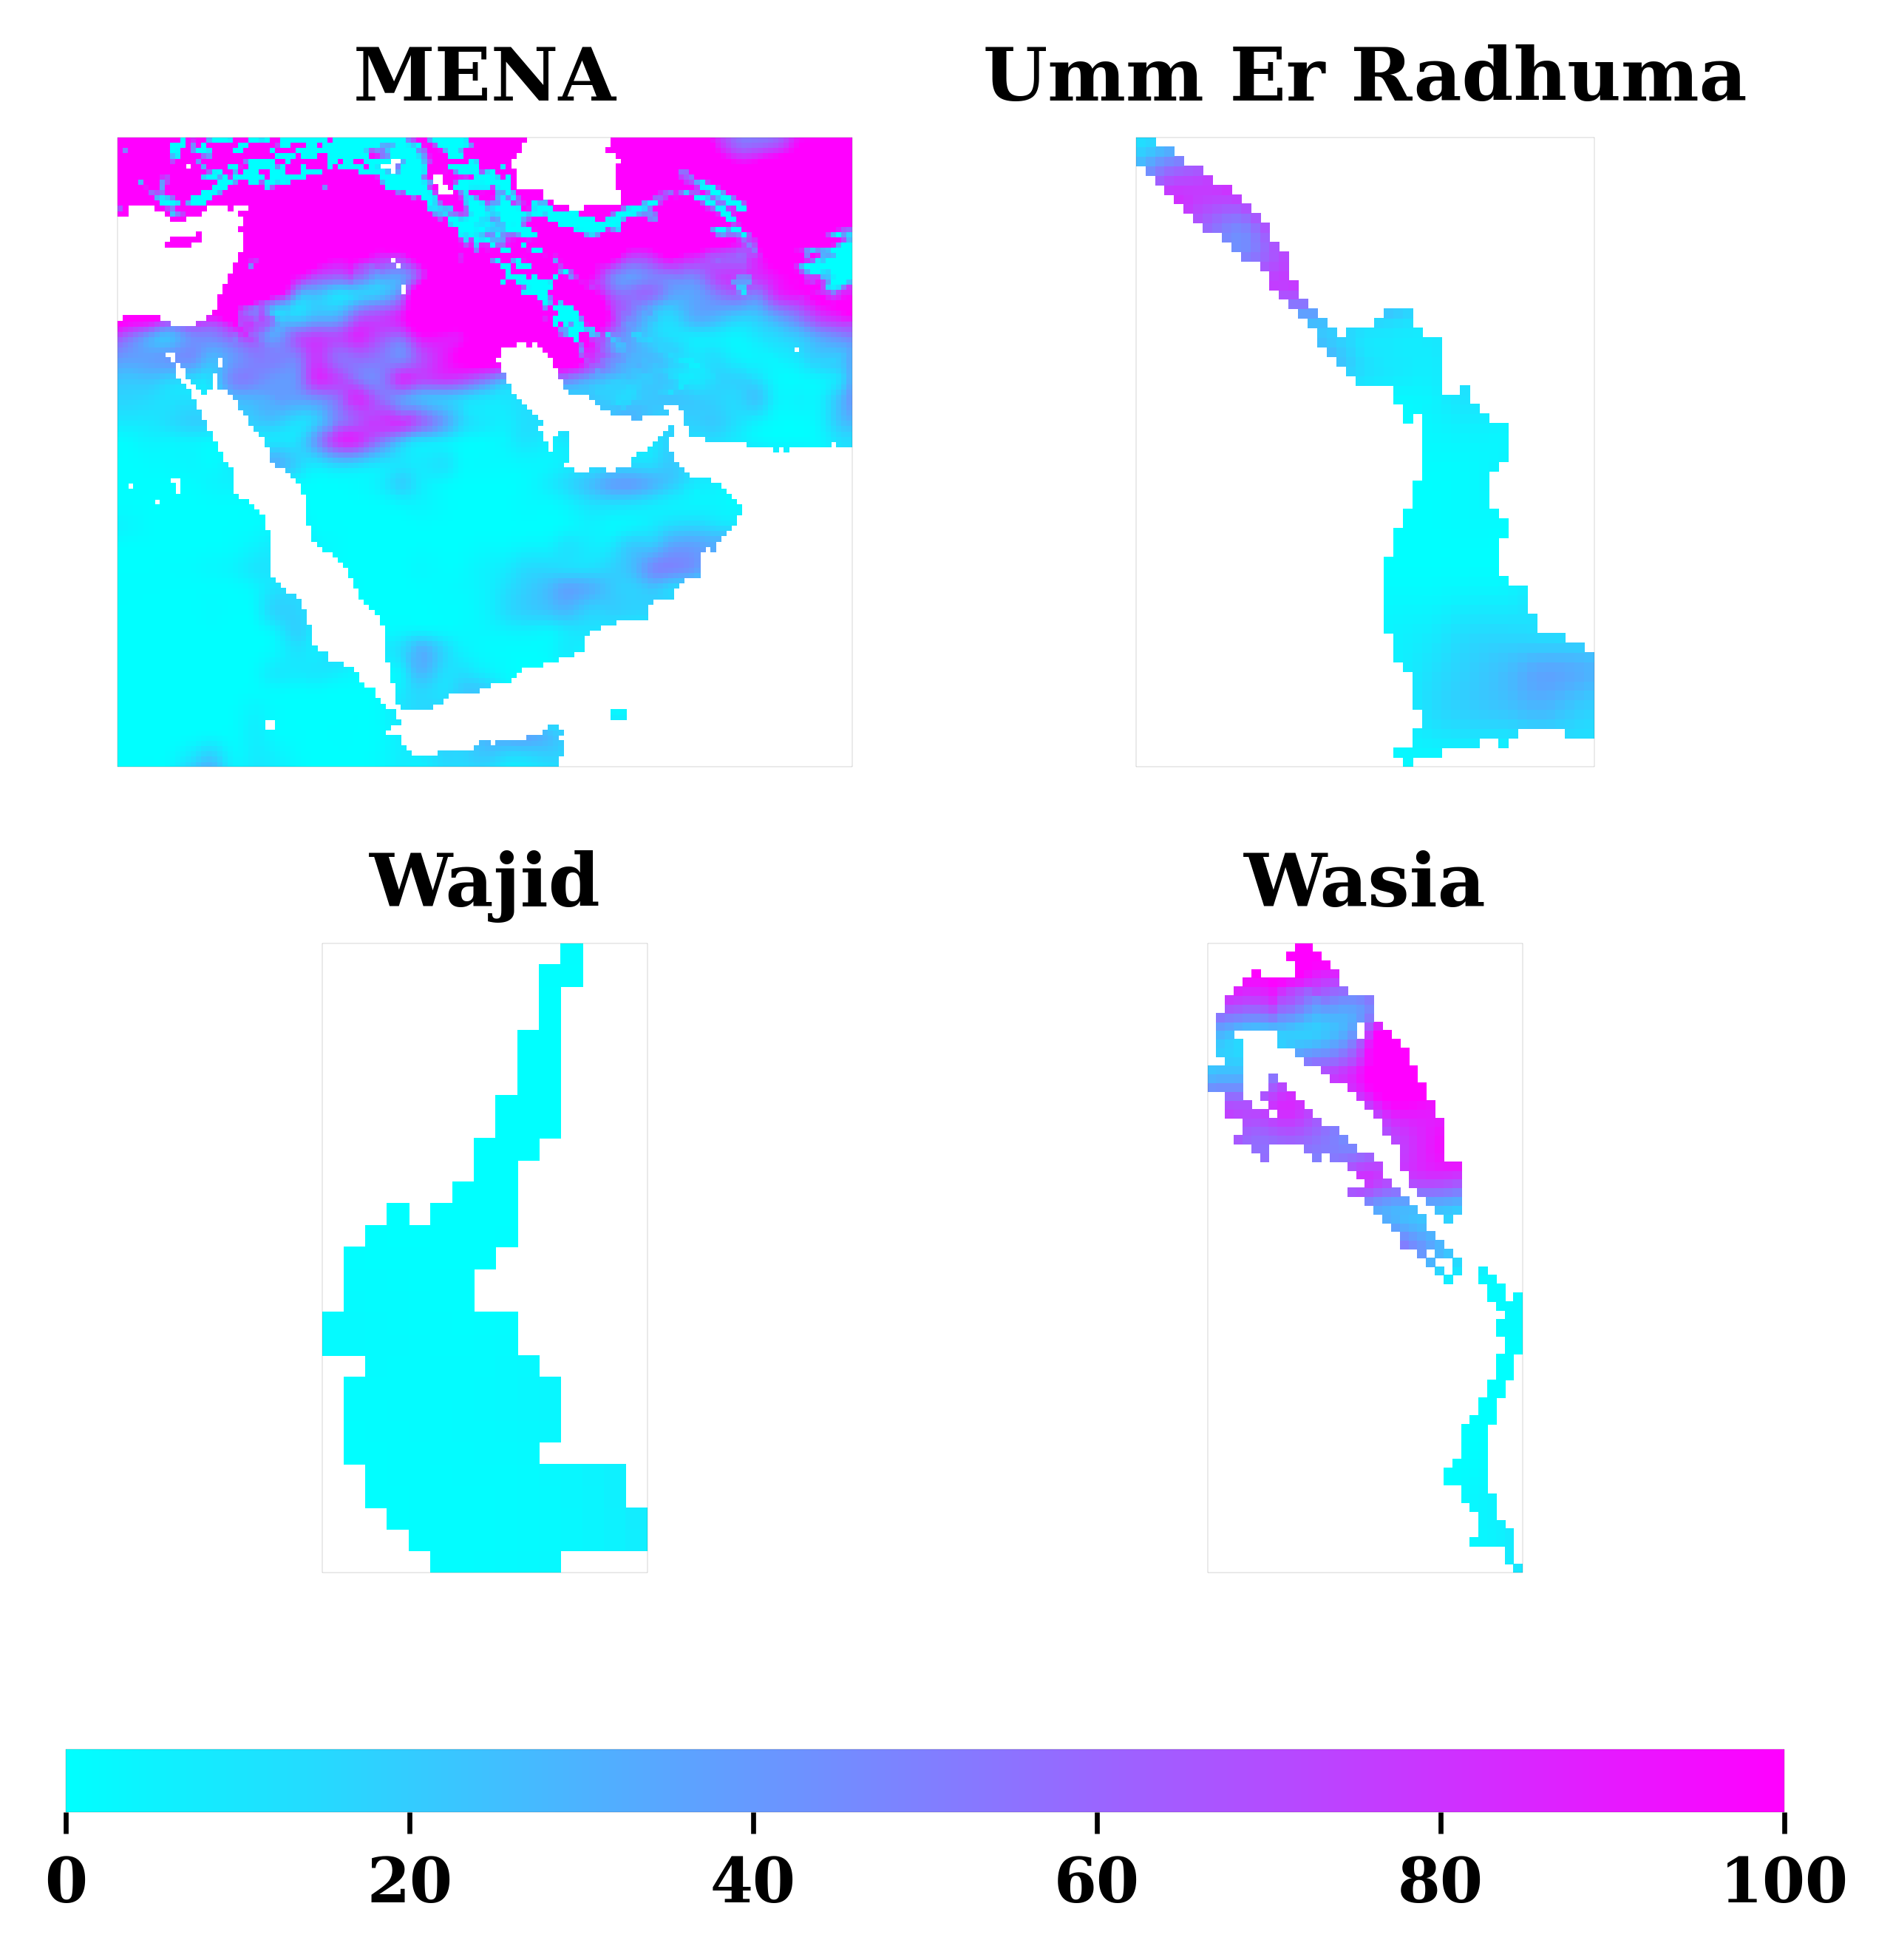

In [213]:
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(3,2,hspace=0.4,wspace=0.05,height_ratios=(1,1,.1))

directory = sorted(glob.glob('gldas__v21__clip__monthly/*.nc'))
samp = xr.open_dataset(directory[1])

fig.add_subplot(gs[0,0])
plt.pcolormesh(samp.Rainfall,cmap='cool',vmin=0,vmax=100)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.title('MENA',fontweight='bold')


fig.add_subplot(gs[0,1])
umm_er = clip2(directory[1],'umm/umm.shp')
plt.pcolormesh(umm_er.Rainfall,cmap='cool',vmin=0,vmax=100)
plt.gca().set_aspect('equal')
plt.title('Umm Er Radhuma',fontweight='bold')
plt.xticks([])
plt.yticks([])


fig.add_subplot(gs[1,0])
wajid = clip2(directory[1],'wajid/wajid.shp')
plt.pcolormesh(wajid.Rainfall,cmap='cool',vmin=0,vmax=100)
plt.gca().set_aspect('equal')
plt.title('Wajid',fontweight='bold')
plt.xticks([])
plt.yticks([])


fig.add_subplot(gs[1,1])
wasia = clip2(directory[1],'wasia/wasia.shp')
s = plt.pcolormesh(wasia.Rainfall,cmap='cool',vmin=0,vmax=100)
plt.gca().set_aspect('equal')
plt.title('Wasia',fontweight='bold')
plt.xticks([])
plt.yticks([])

cax = fig.add_subplot(gs[2,:])
fig.colorbar(s,cax=cax,orientation='horizontal')
fig.tight_layout()
plt.savefig('mena_fourbox.png',bbox_inches='tight')

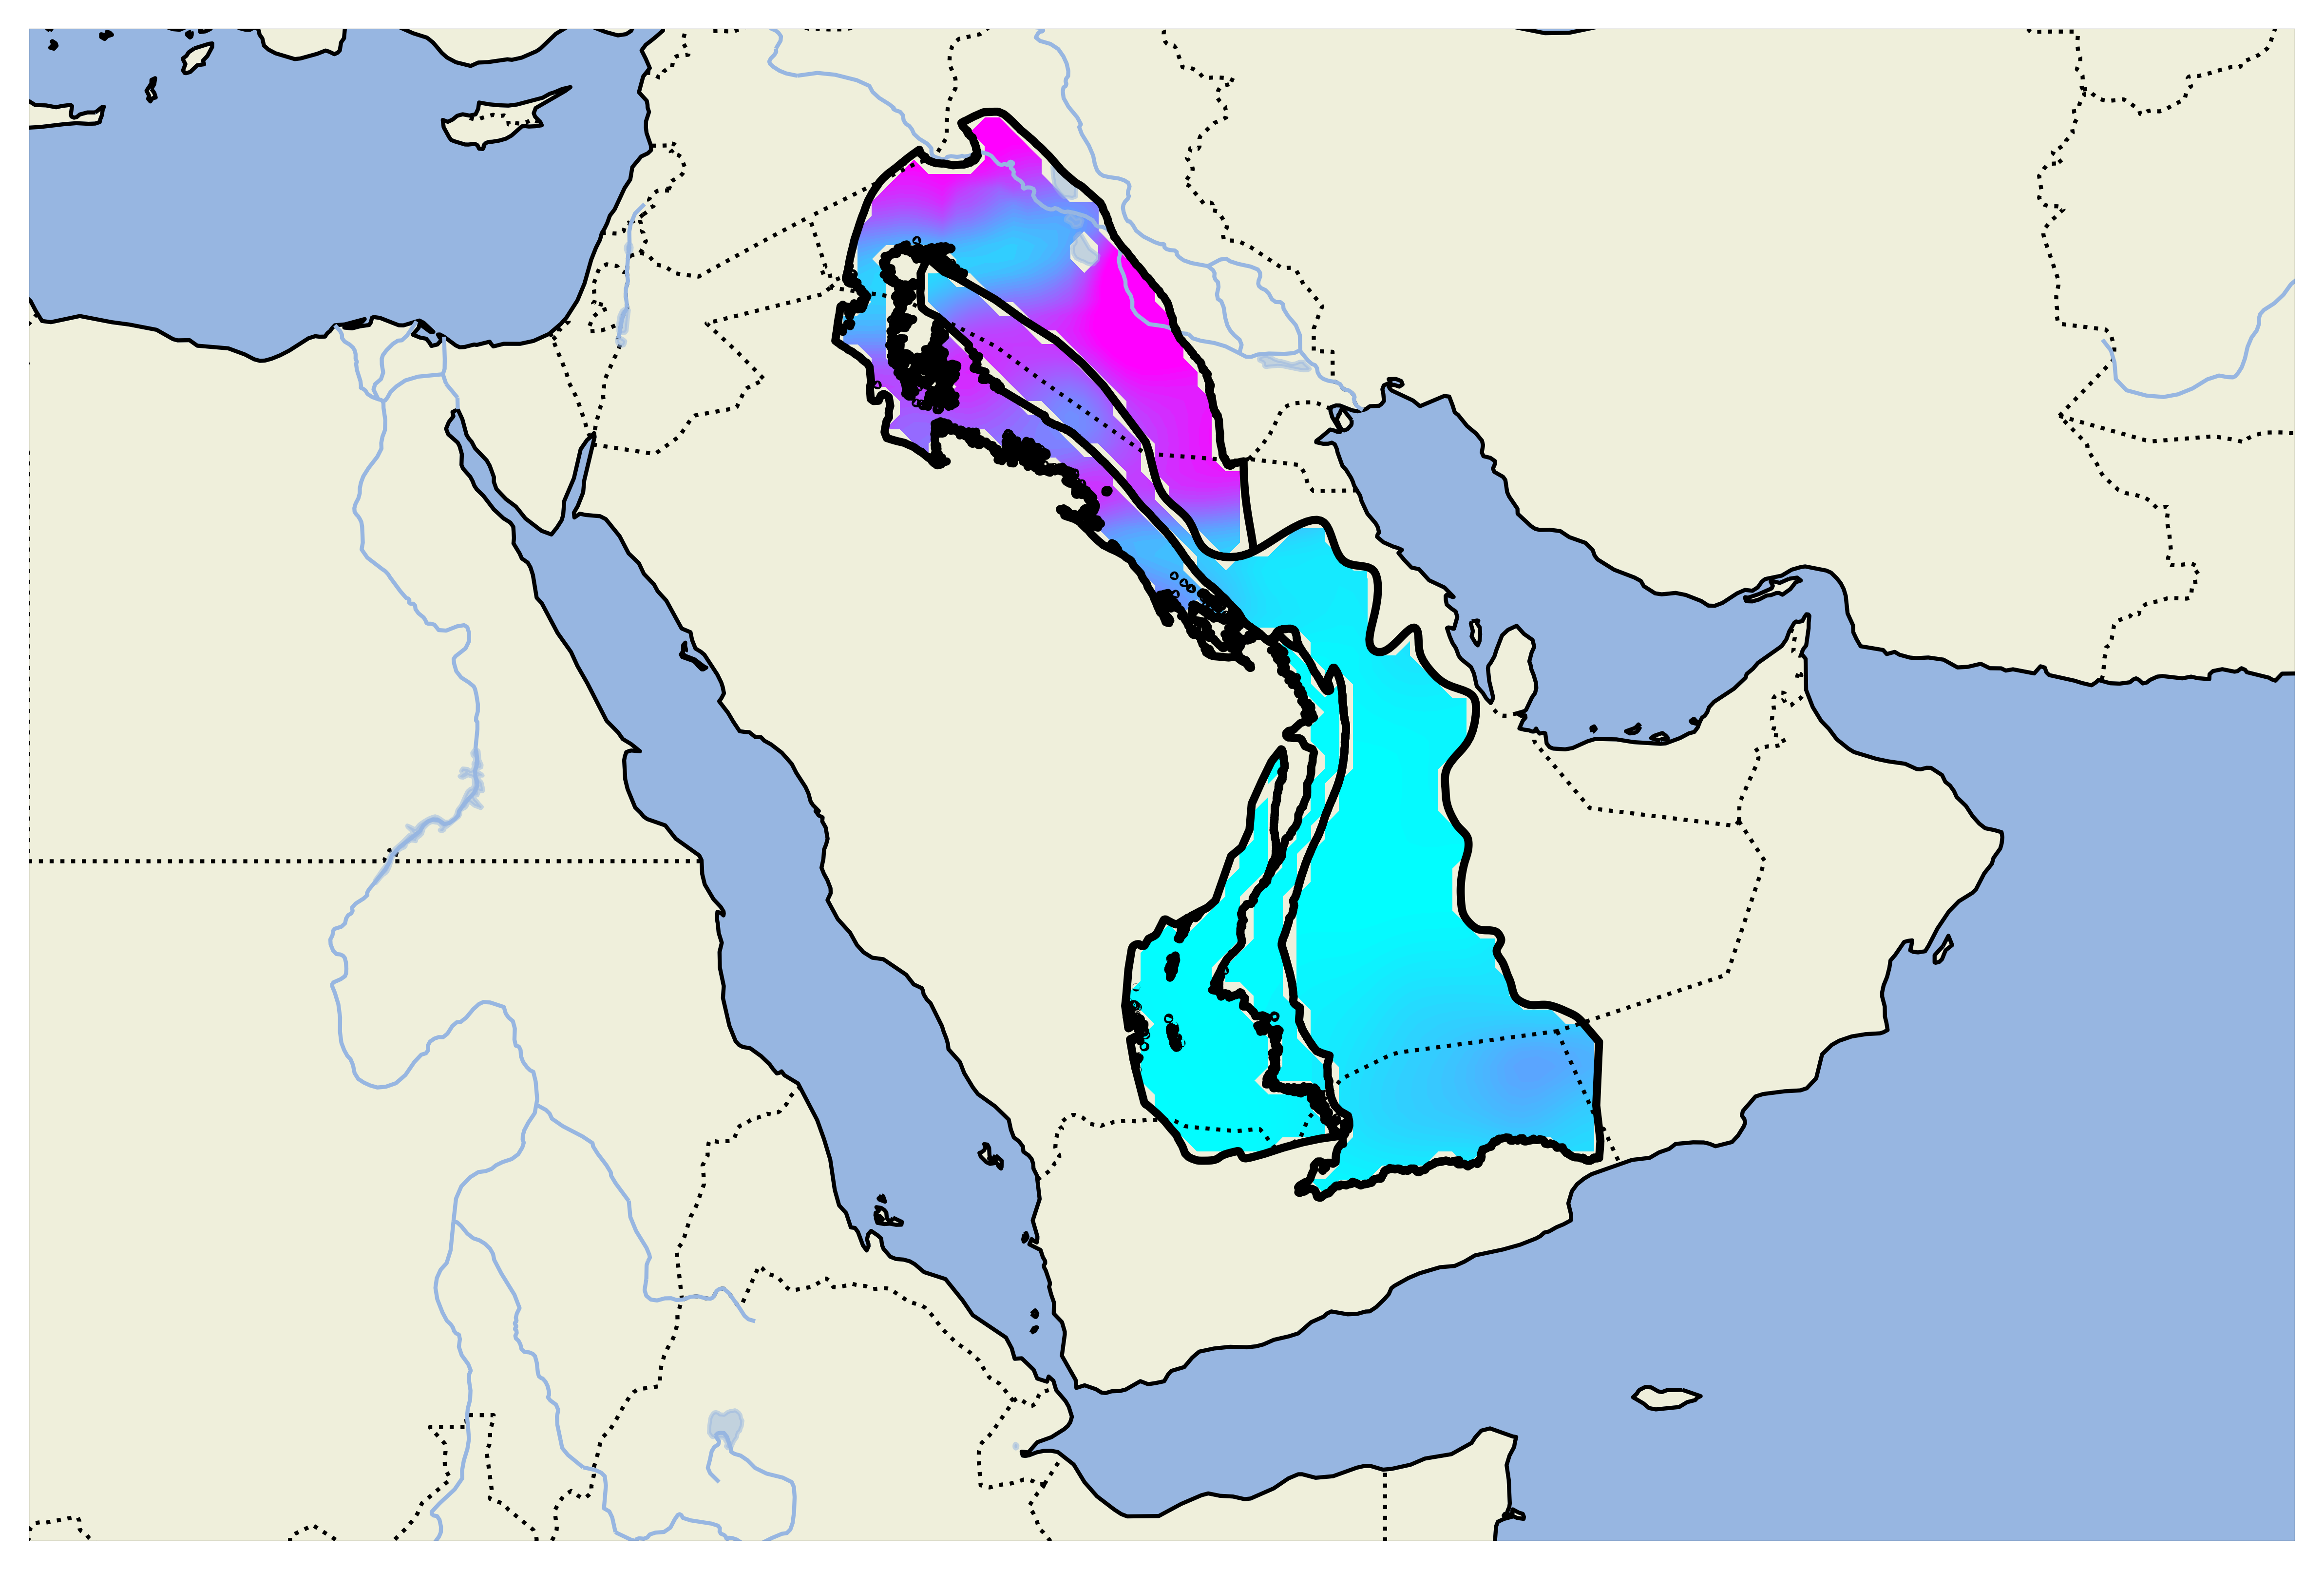

In [215]:
fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([25, 65, 10, 35])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.add_geometries([basins.geometry[0]],crs=ccrs.epsg(32638),facecolor='none',edgecolor='black',linewidth=2) #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[1]],crs=ccrs.epsg(32638),facecolor='none',edgecolor='black',linewidth=2) #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[2]],crs=ccrs.epsg(32638),facecolor='none',edgecolor='black',linewidth=2) #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries([basins.geometry[3]],crs=ccrs.epsg(32638),facecolor='none',edgecolor='black',linewidth=2) #plots bear river, states what starting coordinate system for bear is (26912), picks plot color


plt.contourf(umm_er.lon, umm_er.lat, umm_er.Rainfall, 60,
             transform=ccrs.PlateCarree(),cmap='cool',vmin=0,vmax=100)

plt.contourf(wasia.lon, wasia.lat, wasia.Rainfall, 60,
             transform=ccrs.PlateCarree(),cmap='cool',vmin=0,vmax=100)

plt.contourf(wajid.lon, wajid.lat, wajid.Rainfall, 60,
             transform=ccrs.PlateCarree(),cmap='cool',vmin=0,vmax=100)


# ax.legend(handles=[umm_er_radhuma,wasia,wajid],loc='lower left',fontsize=14) # creates legend

plt.savefig('mena_basins_only.png',bbox_inches='tight')

plt.show() ## plots figure

